# これは何？

箱庭ドローンシミュレータの物理モデルを分析して、PIDパラメータを検討します。

- プラントモデル
  - 高度の運動方程式
- コントローラ
  - PID制御


# 環境のインストール

In [63]:
!git clone --recursive https://github.com/toppers/hakoniwa-drone-education
%cd hakoniwa-drone-education

Cloning into 'hakoniwa-drone-education'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 33 (delta 5), reused 28 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 10.02 KiB | 10.02 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/hakoniwa-drone-education


# Pythonライブラリのインストール

In [64]:
!pip install -r requirements.txt

# PIDパラメータと展開

高度制御のPIDパラメータは、`/content/hakoniwa-drone-education/models/constants/constants.json`で定義されています。

- Alt_Kp
- Alt_Ki
- Alt_Kd



# モデルファイルを生成します

In [65]:
!python src/libs/exmapnd_json.py models/alt_control.json ./out.json

展開後のJSONファイルを ./out.json に保存しました


# ボード線図を見てみよう

num:  [27.84422912, 27.84422912, 0.0]
den:  [0.38154947163136, 19.7962723563008, 1.392211456, 0.0, 0.0]
/usr/local/lib/python3.10/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
ゲイン余裕 (Gain Margin): inf dB
位相余裕 (Phase Margin): 59.34687263836736 degrees
ゲイン余裕発生周波数: nan rad/s
位相余裕発生周波数: 1.645739406761215 rad/s


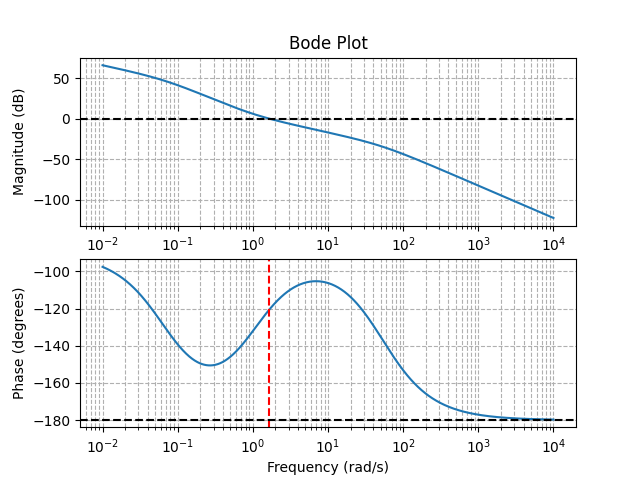

In [68]:
!python src/libs/analyze_model.py out.json --mode bode ls
# 画像の表示
from IPython.display import Image
Image('bode_plot.png')

# ステップ応答を見てみよう

num:  [27.84422912, 27.84422912, 0.0]
den:  [0.38154947163136, 19.7962723563008, 29.236440576, 27.84422912, 0.0]
Overshoot: 22.88% at 2.04 seconds
Steady-State Value: 1.00
Steady-State Error: 0.00
Rise Time (10%-90%): 0.56 seconds
Delay Time (50%): 0.56 seconds
Settling Time (within ±5%): 46.30 seconds


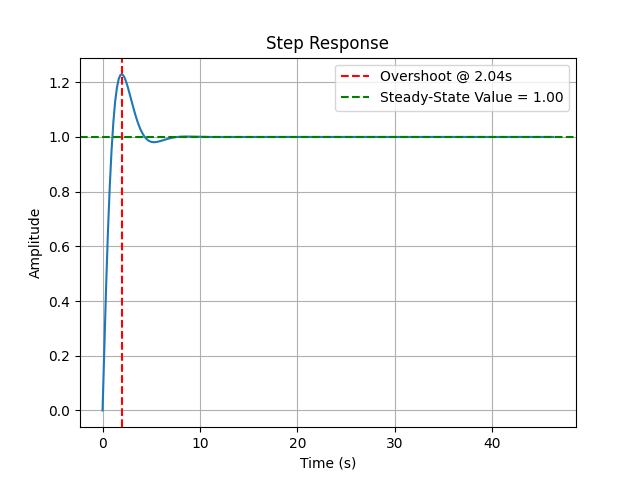

In [69]:
!python src/libs/analyze_model.py out.json --mode step ws
# 画像の表示
from IPython.display import Image
Image('step_plot.png')